In [18]:
pip install jugaad-data

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [94]:
import pandas as pd
from datetime import datetime, timedelta
from jugaad_data.nse import stock_df
import os
import time
import random
import matplotlib.pyplot as plt
import numpy as np

In [69]:
output_file = "README.md"
images_dir = "images"

# Create the images directory if it doesn't exist
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

In [70]:
# Read the CSV file into a DataFrame
df = pd.read_csv('IPO_16To25.csv')

# Filter rows where the SECURITY TYPE is "EQ"
eq_symbols_df = df[df['SECURITY TYPE'] == 'EQ']

# Extract the Symbol column
symbols = eq_symbols_df['Symbol'].tolist()

# Save the symbols to a new CSV file
symbols_df = pd.DataFrame(symbols, columns=['Symbol'])
symbols_df.to_csv('eq_symbols.csv', index=False)

print("EQ symbols saved to 'eq_symbols.csv'")

EQ symbols saved to 'eq_symbols.csv'


In [71]:
print("No. of stocks listed from the year 2016 of type EQ : ", len(symbols))
print(symbols)

No. of stocks listed from the year 2016 of type EQ :  336
['LAXMIDENTL', 'QUADFUTURE', 'SGLTL', 'INDOFARM', 'UNIMECH', 'VENTIVE', 'CARRARO', 'SENORES', 'TRANSRAILL', 'SANATHAN', 'CEWATER', 'DAMCAPITAL', 'IGIL', 'IKS', 'VMM', 'SAILIFE', 'MOBIKWIK', 'SURAKSHA', 'EIEL', 'NTPCGREEN', 'BLACKBUCK', 'NIVABUPA', 'SWIGGY', 'ACMESOLAR', 'SAGILITY', 'AFCONS', 'GODAVARIB', 'WAAREEENER', 'DBEIL', 'HYUNDAI', 'GARUDA', 'KRN', 'ARKADE', 'NORTHARC', 'WCIL', 'PNGJL', 'KROSS', 'BAJAJHFL', 'STYLEBAAZA', 'ECOSMOBLTY', 'PREMIERENE', 'INTERARCH', 'FIRSTCRY', 'UNIECOM', 'OLAELEC', 'CEIGALL', 'AKUMS', 'SANSTAR', 'EMCURE', 'BANSALWIRE', 'ABDL', 'STANLEY', 'DEEDEV', 'IXIGO', 'KRONOX', 'AWFIS', 'GODIGIT', 'TBOTEK', 'AADHARHFC', 'INDGN', 'JNKINDIA', 'IDEAFPO', 'BHARTIHEXA', 'KRYSTAL', 'PVSL', 'GOPAL', 'JGCHEM', 'RKSWAMY', 'EXICOM', 'GPTHEALTH', 'JUNIPER', 'ENTERO', 'CAPITALSFB', 'JSFB', 'RPTECH', 'PARKHOTELS', 'BLSE', 'EPACK', 'MEDIASSIST', 'JYOTICNC', 'INNOVACAP', 'AZAD', 'HAPPYFORGE', 'MUFTI', 'MUTHOOTMF', 'SURA

In [72]:
# Create the "data" directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Dates for fetching data
from_date = date(2016, 1, 1)
to_date = date(2025, 1, 25)

# Record the total start time
total_start_time = time.time()

# Download stock data and save it to CSV
for symbol in symbols:
    csv_file_path = f"data/{symbol}.csv"
    if os.path.exists(csv_file_path):
        print(f"File for {symbol} already exists. Skipping...")
        continue  # Skip to the next symbol

    # Add a delay of 2 to 5 seconds between calls - Else gets throttled by NSE
    time.sleep(random.uniform(2, 5))

    try:
        start_time = time.time()  # Record the start time

        # Fetch stock data
        print(f"Fetching data for {symbol}...")
        df = stock_df(symbol=symbol, 
                      from_date=from_date, 
                      to_date=to_date, 
                      series="EQ")

        # Save to CSV
        df.to_csv(csv_file_path, index=False)
        save_time = time.time()  # Record the time after saving

        print(f"Total time taken for {symbol}: {save_time - start_time:.2f} seconds\n")

    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# Record the total end time
total_end_time = time.time()
print(f"Total time taken for all symbols: {total_end_time - total_start_time:.2f} seconds\n")

File for LAXMIDENTL already exists. Skipping...
File for QUADFUTURE already exists. Skipping...
File for SGLTL already exists. Skipping...
File for INDOFARM already exists. Skipping...
File for UNIMECH already exists. Skipping...
File for VENTIVE already exists. Skipping...
File for CARRARO already exists. Skipping...
File for SENORES already exists. Skipping...
File for TRANSRAILL already exists. Skipping...
File for SANATHAN already exists. Skipping...
File for CEWATER already exists. Skipping...
File for DAMCAPITAL already exists. Skipping...
File for IGIL already exists. Skipping...
File for IKS already exists. Skipping...
File for VMM already exists. Skipping...
File for SAILIFE already exists. Skipping...
File for MOBIKWIK already exists. Skipping...
File for SURAKSHA already exists. Skipping...
File for EIEL already exists. Skipping...
File for NTPCGREEN already exists. Skipping...
File for BLACKBUCK already exists. Skipping...
File for NIVABUPA already exists. Skipping...
File 

#### Distribution of Lifetime IPO returns from the date launched till date

Results and combined plot have been written to README.md and image is stored in the 'images' folder.


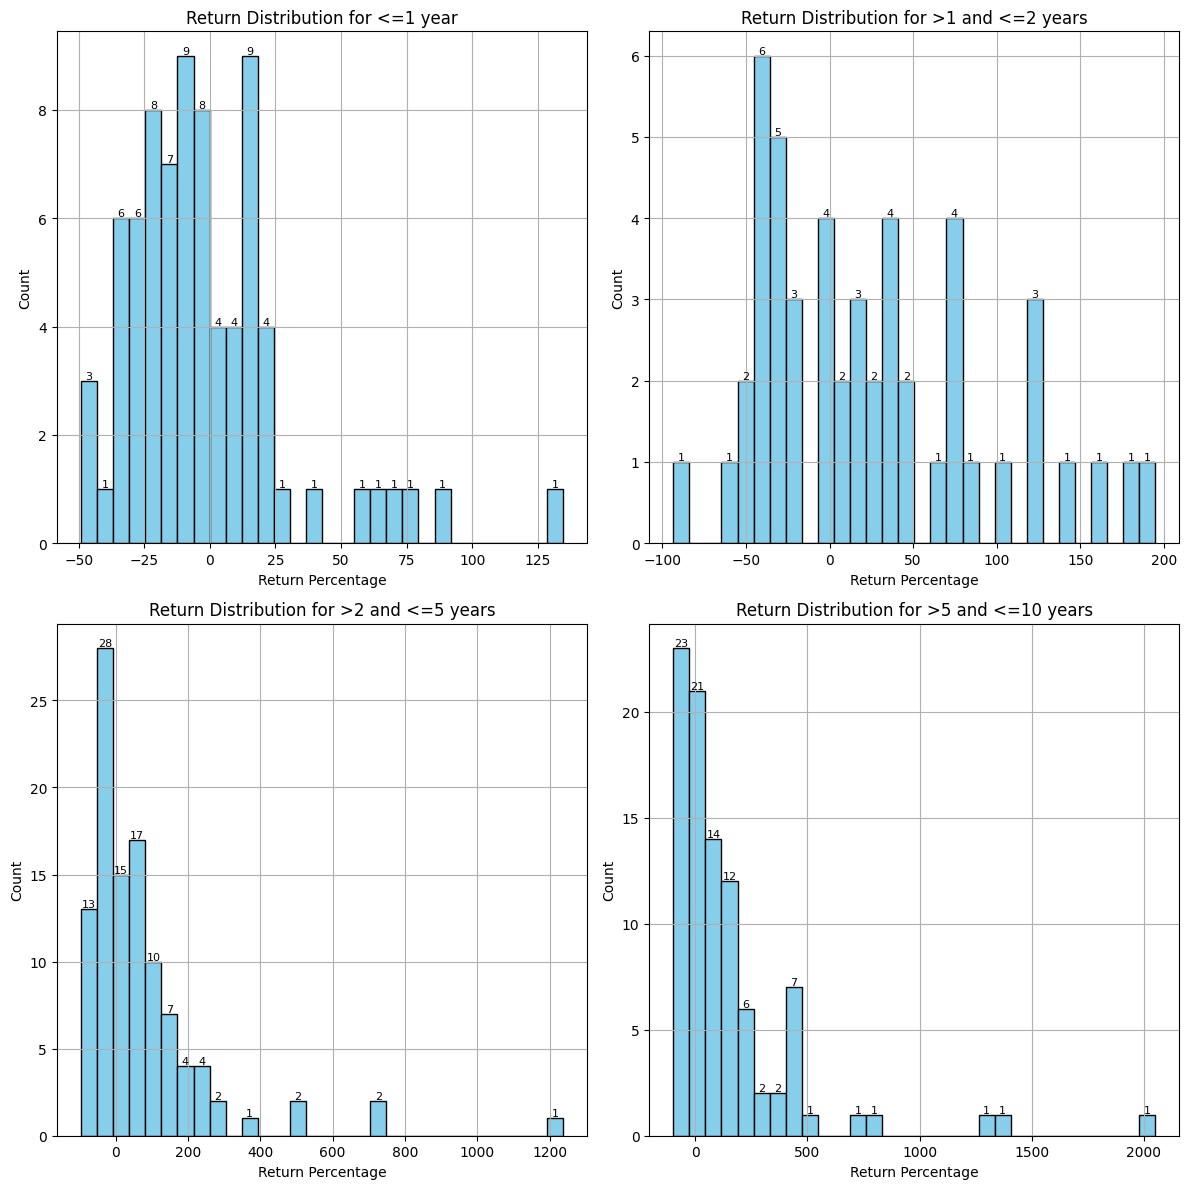

In [89]:
# Path to the directory containing CSV files
data_dir = "data/"

# List to store return percentages
returns = []

# Loop through all files in the "data" directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        # Extract stock name from the filename (excluding the .csv extension)
        stock_name = filename.replace(".csv", "")
        
        # Load the stock data from the CSV file
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Get the oldest and latest closing prices
        oldest_close = df['CLOSE'].iloc[-1]  # Oldest price (last row)
        latest_close = df['CLOSE'].iloc[0]  # Latest price (first row)
        
        # Calculate the return percentage
        return_percentage = ((latest_close - oldest_close) / oldest_close) * 100
        
        # Store the return percentage in the list
        returns.append(return_percentage)

# Open the README.md file in write mode to clean it
with open(output_file, "w") as readme:
    readme.write("# Stock Performance Analysis\n")
    readme.write("This report categorizes stocks by IPO age and displays those with their return distribution%.\n\n")
    
    # Create a figure to hold all subplots
    plt.figure(figsize=(12, 12))
    
    # Iterate through your categories and plot the histograms on subplots
    for idx, (category, returns) in enumerate(returns_by_category.items(), 1):
        plt.subplot(2, 2, idx)
        
        # Plot the histogram
        n, bins, patches = plt.hist(returns, bins=30, color='skyblue', edgecolor='black')
        
        # Annotate counts on top of each bar
        for i in range(len(patches)):
            count = int(n[i])  # Get the count for each bar
            if count > 0:  # Only annotate bars with counts > 0
                plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
                         n[i], 
                         str(count), 
                         ha='center', 
                         va='bottom', 
                         fontsize=8, 
                         color='black')

        # Set titles and labels
        plt.xlabel('Return Percentage')
        plt.ylabel('Count')
        plt.title(f'Return Distribution for {category}')
        plt.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the combined plot to the images folder
    combined_plot_filename = f"{images_dir}/combined_return_distribution.png"
    plt.savefig(combined_plot_filename, format="png")
    
    # Write the plot reference to the README.md file
    readme.write("## Return Distributions for different IPO ages\n")
    readme.write(f"![Combined Return Distribution](./{combined_plot_filename})\n\n")
    
    print(f"Results and combined plot have been written to {output_file} and image is stored in the '{images_dir}' folder.")

#### CAGR Distribution in different categories

Results and combined plot have been written to README.md and image is stored in the 'images' folder.


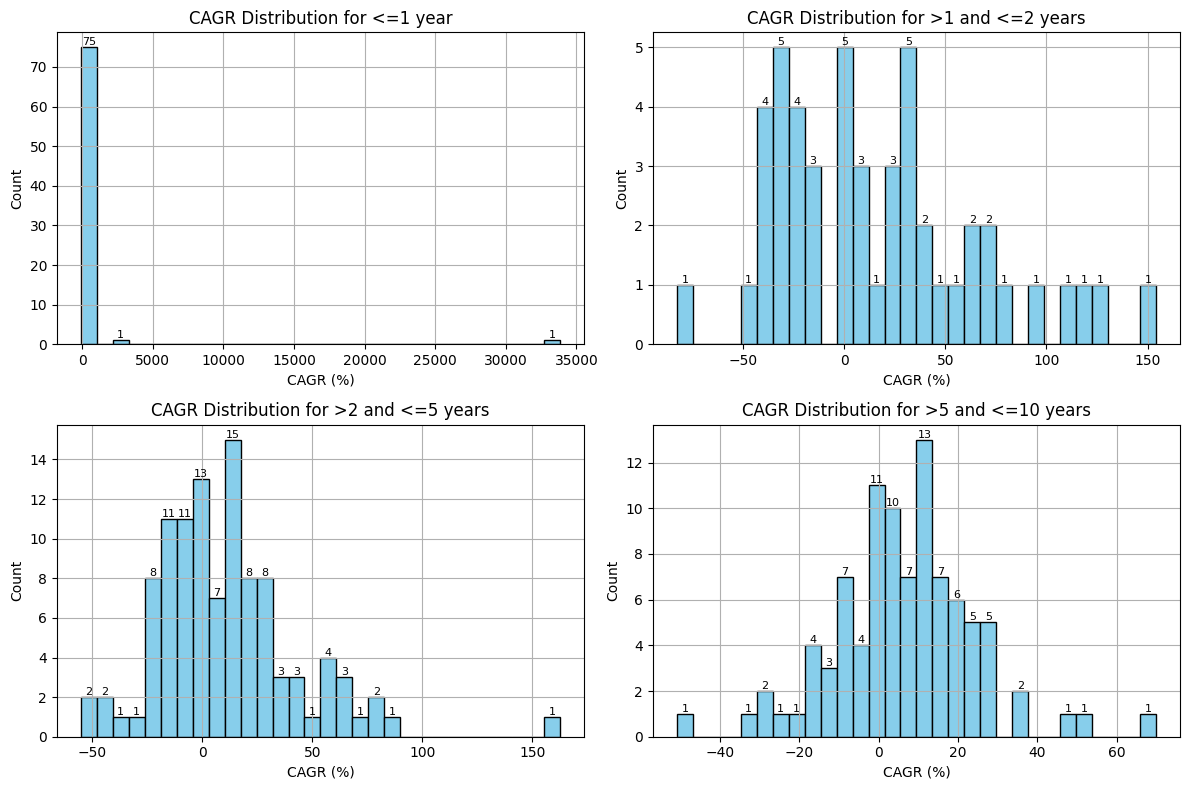

In [90]:
# Path to the directory containing CSV files
data_dir = "data/"

# Dictionary to store CAGR values for each year category
cagr_by_category = {
    "<=1 year": [],
    ">1 and <=2 years": [],
    ">2 and <=5 years": [],
    ">5 and <=10 years": []
}

# Loop through all files in the "data" directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        # Extract stock name from the filename (excluding the .csv extension)
        stock_name = filename.replace(".csv", "")
        
        # Load the stock data from the CSV file
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Parse the oldest and latest dates
        oldest_date = datetime.strptime(df['DATE'].iloc[-1], "%Y-%m-%d")
        latest_date = datetime.strptime(df['DATE'].iloc[0], "%Y-%m-%d")
        
        # Calculate the number of years between the oldest and latest date
        years_diff = (latest_date - oldest_date).days / 365.25
        
        # Calculate CAGR
        oldest_close = df['CLOSE'].iloc[-1]  # Oldest price (last row)
        latest_close = df['CLOSE'].iloc[0]  # Latest price (first row)
        if years_diff > 0:
            cagr = ((latest_close / oldest_close) ** (1 / years_diff)) - 1
            cagr *= 100  # Convert to percentage
            
            # Assign the CAGR to the appropriate year category
            if years_diff <= 1:
                cagr_by_category["<=1 year"].append(cagr)
            elif 1 < years_diff <= 2:
                cagr_by_category[">1 and <=2 years"].append(cagr)
            elif 2 < years_diff <= 5:
                cagr_by_category[">2 and <=5 years"].append(cagr)
            elif 5 < years_diff <= 10:
                cagr_by_category[">5 and <=10 years"].append(cagr)

# Open the README.md file in append mode
with open(output_file, "a") as readme:
    readme.write("# Stock Performance Analysis\n")
    readme.write("This report categorizes stocks by IPO age and displays those with a CAGR of >=20%.\n\n")
    
    # Create a figure to hold all subplots
    plt.figure(figsize=(12, 8))
    
    # Iterate through your categories and plot the histograms for CAGR
    for idx, (category, cagr_values) in enumerate(cagr_by_category.items(), 1):
        plt.subplot(2, 2, idx)
        
        # Plot the histogram for CAGR
        n, bins, patches = plt.hist(cagr_values, bins=30, color='skyblue', edgecolor='black')

        # Annotate counts on top of each bar
        for i in range(len(patches)):
            count = int(n[i])  # Get the count for each bar
            if count > 0:  # Only annotate bars with counts > 0
                plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
                         n[i], 
                         str(count), 
                         ha='center', 
                         va='bottom', 
                         fontsize=8, 
                         color='black')

        # Set titles and labels
        plt.xlabel('CAGR (%)')
        plt.ylabel('Count')
        plt.title(f'CAGR Distribution for {category}')
        plt.grid(True)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the combined plot to the images folder
    combined_plot_filename = f"{images_dir}/combined_cagr_distribution.png"
    plt.savefig(combined_plot_filename, format="png")
    
    # Write the plot reference to the README.md file
    readme.write("## Combined CAGR Distribution\n")
    readme.write(f"![Combined CAGR Distribution](./{combined_plot_filename})\n\n")
    
    print(f"Results and combined plot have been written to {output_file} and image is stored in the '{images_dir}' folder.")

##### With passing age of the IPO, it is getting tougher to pick the stocks which generates a base 20% CAGR

#### Get all the top promisers in each one of the buckets

In [96]:
# Path to the directory containing CSV files
data_dir = "data/"
metadata_file = "IPO_16To25.csv"

# Initialize dictionary for categories and total stock counts
stocks_by_category = {f">{i} and <= {i + 1} years": [] for i in range(10)}
stocks_by_category[">0 and <= 1 years"] = []
total_stocks_by_category = {f">{i} and <= {i + 1} years": 0 for i in range(10)}
total_stocks_by_category[">0 and <= 1 years"] = 0

# Load IPO metadata to map symbols to company names
metadata_df = pd.read_csv(metadata_file, delimiter=",")
symbol_to_name = dict(zip(metadata_df["Symbol"], metadata_df["COMPANY NAME"]))

# Loop through all files in the "data" directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        # Extract stock symbol from the filename (excluding the .csv extension)
        stock_symbol = filename.replace(".csv", "")
        company_name = symbol_to_name.get(stock_symbol, "Unknown Company")
        
        # Load the stock data from the CSV file
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)
        
        # Convert 'DATE' column to datetime
        df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d")
        
        # Parse the oldest and latest dates
        oldest_date = df['DATE'].iloc[-1]
        latest_date = df['DATE'].iloc[0]
        
        # Calculate the number of years between the oldest and latest date
        years_diff = (latest_date - oldest_date).days / 365.25
        
        # Calculate CAGR
        oldest_close = df['CLOSE'].iloc[-1]  # Oldest price (last row)
        latest_close = df['CLOSE'].iloc[0]  # Latest price (first row)
        if years_diff > 0:
            cagr = ((latest_close / oldest_close) ** (1 / years_diff)) - 1
            cagr *= 100  # Convert to percentage
            
            # Determine the category and increment the total stock count
            if years_diff <= 1:
                category_key = ">0 and <= 1 years"
            else:
                for i in range(1, 10):
                    if i < years_diff <= i + 1:
                        category_key = f">{i} and <= {i + 1} years"
                        break
            
            total_stocks_by_category[category_key] += 1  # Increment total count
            
            # Assign the stock to the appropriate year category if CAGR >= 20%
            if cagr >= 20:
                # Calculate the last quarter and last year percentage change
                latest_90_days = df[df['DATE'] >= (latest_date - timedelta(days=90))]  # Last 90 days data
                latest_365_days = df[df['DATE'] >= (latest_date - timedelta(days=365))]  # Last 365 days data
                
                # Last quarter percentage change (from 90 days ago to LTP)
                if len(latest_90_days) > 1:
                    last_quarter_change = ((latest_close - latest_90_days['CLOSE'].iloc[-1]) / latest_90_days['CLOSE'].iloc[-1]) * 100
                    quarter_trend = 'green' if last_quarter_change > 0 else 'red'
                else:
                    last_quarter_change = 0
                    quarter_trend = 'gray'  # In case there are not enough data points for 90 days
                
                # Last year percentage change (from 365 days ago to LTP)
                if len(latest_365_days) > 1:
                    last_year_change = ((latest_close - latest_365_days['CLOSE'].iloc[-1]) / latest_365_days['CLOSE'].iloc[-1]) * 100
                    year_trend = 'green' if last_year_change > 0 else 'red'
                else:
                    last_year_change = 0
                    year_trend = 'gray'  # In case there are not enough data points for 365 days
                
                # Add stock to the category
                stocks_by_category[category_key].append(
                    (stock_symbol, company_name, cagr, last_quarter_change, last_year_change, quarter_trend, year_trend)
                )

# Open the README.md file in write mode
with open(output_file, "a") as readme:
    readme.write("# Stock Performance Analysis\n")
    readme.write("This report categorizes stocks by IPO age and displays those with a CAGR of >=20%.\n\n")

    # Print tables for each category with success percentage and company names
    for category, stocks in stocks_by_category.items():
        total_count = total_stocks_by_category[category]
        success_count = len(stocks)
        success_percentage = (success_count / total_count) * 100 if total_count > 0 else 0

        # Write to README.md
        readme.write(f"## {category}\n")
        readme.write(f"Total Stocks in Category: {total_count}\n")
        readme.write(f"Success Rate (CAGR >= 20%): {success_percentage:.2f}%\n\n")

        if stocks:
            # Write table header to README.md
            readme.write("| Symbol               | Company Name                                         | CAGR (%) | Last Quarter Change (%) | Last Year Change (%) |\n")
            readme.write("|----------------------|-----------------------------------------------------|----------|-------------------------|----------------------|\n")

            # Write the table content
            for symbol, name, cagr, last_quarter_change, last_year_change, quarter_trend, year_trend in sorted(stocks, key=lambda x: x[2], reverse=True):
                # Prepare the trend colors
                quarter_trend_color = f'<span style="color:{quarter_trend};">{last_quarter_change:.2f}</span>'
                year_trend_color = f'<span style="color:{year_trend};">{last_year_change:.2f}</span>'
                
                # Write the formatted row to README.md
                readme.write(f"| {symbol:<20} | {name:<50} | {cagr:.2f} | {quarter_trend_color} | {year_trend_color} |\n")
        else:
            readme.write("No stocks in this category with CAGR >= 20%.\n")
        
        readme.write("\n---\n\n")

print(f"Results have been written to {output_file}.")

Results have been written to README.md.
